In [74]:
#import all need libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [75]:
## set matplotlib defaults;
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure', 
    autolayout = True
)
plt.rc(
    'axes', 
    labelsize = 'large', 
    labelweight = 'bold', 
    titlesize = 'large', 
    titleweight = 14, 
    titlepad = 10
)


In [76]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/DS/horse.csv')

In [77]:
#view some data
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [78]:

def preprocess(d):
    binary_cols = ["surgery", "surgical_lesion", "cp_data", ]
    d[binary_cols] = d[binary_cols].replace({"yes":1,"no":0})
    d["age"] = d["age"].replace({"young":0, "adult":1})
    d["capillary_refill_time"] = d["capillary_refill_time"].replace({1:0, 2:1})
    d["outcome"] = d["outcome"].replace({"died":0, "euthanized":1, "lived": 2})
    d = d.drop(columns = ["hospital_number"])
    # One hot encode variables
    d = pd.get_dummies(d, dummy_na=True)
    
    # Drop those where we don't know the outcome
    d = d[d.outcome.isnull()==False]
    
    # Rename outcome to torget
    d["target"] = d["outcome"]
    del d["outcome"]

    y = d["target"]
    del d["target"]
    X = d
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Replace na's 
    nan_cols = ["packed_cell_volume", "pulse", "rectal_temp", "respiratory_rate","nasogastric_reflux_ph", 
                "abdomo_protein", "total_protein"]
    for c in nan_cols:
        med = X_train[c].median()
        X_train.loc[:, c] = X_train[c].fillna(med)
        X_test.loc[:, c] = X_test[c].fillna(med)
    
    d["target"] = y
    
    return X_train, X_test, y_train, y_test, d


In [79]:
X_train, X_test, y_train, y_test, df = preprocess(df)
X_train.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,...,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomen_nan,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,abdomo_appearance_nan
6,1,1,37.9,48.0,16.0,5.0,37.0,7.0,2.0,1,...,1,0,0,0,0,0,0,0,0,1
183,0,1,38.2,68.0,32.0,5.0,43.0,65.0,2.0,0,...,0,0,0,1,0,0,0,0,0,1
185,1,1,39.3,64.0,90.0,5.0,39.0,6.7,2.0,1,...,0,0,0,0,0,1,0,0,0,1
146,0,1,38.0,44.0,12.0,6.5,33.0,6.5,2.0,1,...,0,1,0,0,0,0,0,0,0,1
30,0,1,37.7,96.0,30.0,4.0,66.0,7.5,2.0,1,...,1,0,0,0,0,0,0,0,0,1


In [80]:
X_train.isnull().sum().sum() 


0

In [81]:
#Get columns correlated to the target surgery
corred_cols = list(df.corr().target.abs().sort_values(ascending=False).head(n=30).index)
corred_cols = corred_cols[1:]
corred_cols

['packed_cell_volume',
 'pulse',
 'surgical_lesion',
 'peripheral_pulse_normal',
 'mucous_membrane_normal_pink',
 'pain_extreme_pain',
 'peripheral_pulse_reduced',
 'capillary_refill_time_more_3_sec',
 'capillary_refill_time_less_3_sec',
 'total_protein',
 'abdominal_distention_none',
 'temp_of_extremities_cool',
 'pain_alert',
 'abdomo_appearance_serosanguious',
 'pain_severe_pain',
 'temp_of_extremities_normal',
 'abdomo_protein',
 'peristalsis_absent',
 'pain_mild_pain',
 'abdominal_distention_moderate',
 'peristalsis_hypermotile',
 'mucous_membrane_bright_red',
 'nasogastric_reflux_ph',
 'surgery',
 'rectal_exam_feces_absent',
 'rectal_exam_feces_normal',
 'abdominal_distention_severe',
 'abdomen_other',
 'mucous_membrane_dark_cyanotic']

In [82]:
df.corr()

,surgery,age,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,...,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomen_nan,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,abdomo_appearance_nan,target
surgery,1.000000,-0.089319,-0.040680,0.186886,0.201423,-0.175801,0.042034,0.044828,-0.035133,0.605023,...,0.177461,-1.616970e-01,-0.160798,-0.236348,0.013465,-0.053280,0.144652,0.157327,-0.183161,-0.189222
age,-0.089319,1.000000,-0.196613,-0.529701,-0.411915,-0.028004,0.147826,0.118103,0.062099,-0.044734,...,0.085996,6.298367e-02,0.010457,0.076955,-0.265144,-0.061157,-0.041509,0.023619,0.055546,0.101782
rectal_temp,-0.040680,-0.196613,1.000000,0.218868,0.268846,0.228306,0.065101,-0.060817,0.009343,-0.018796,...,-0.044135,-5.330977e-02,-0.038860,0.066354,0.099225,0.072555,0.045214,-0.026684,-0.069061,0.019362
pulse,0.186886,-0.529701,0.218868,1.000000,0.469368,0.005796,0.405660,-0.086533,0.020937,0.269318,...,0.090690,-1.220066e-01,-0.134149,-0.137802,0.083394,-0.080197,0.018558,0.298325,-0.176880,-0.366235
respiratory_rate,0.201423,-0.411915,0.268846,0.469368,1.000000,0.127164,0.086394,-0.090743,-0.074056,0.239740,...,0.033291,-1.681054e-01,-0.062158,-0.118523,0.169078,-0.081611,-0.020427,0.048759,0.035754,-0.089952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
abdomo_appearance_clear,-0.053280,-0.061157,0.072555,-0.080197,-0.081611,0.077599,-0.104380,0.034326,-0.025926,-0.122289,...,-0.052544,5.804234e-02,0.005358,0.095445,-0.003593,1.000000,-0.172159,-0.169981,-0.442356,0.137451
abdomo_appearance_cloudy,0.144652,-0.041509,0.045214,0.018558,-0.020427,0.007015,-0.052787,-0.049668,-0.085637,0.021645,...,0.032492,1.332135e-01,-0.044198,-0.037164,0.027287,-0.172159,1.000000,-0.184148,-0.479224,0.022704
abdomo_appearance_serosanguious,0.157327,0.023619,-0.026684,0.298325,0.048759,0.148180,0.251703,-0.069703,0.075375,0.245927,...,0.221493,4.218532e-18,-0.041608,-0.073076,-0.173602,-0.169981,-0.184148,1.000000,-0.473160,-0.232290
abdomo_appearance_nan,-0.183161,0.055546,-0.069061,-0.176880,0.035754,-0.203506,-0.072489,0.062543,0.078338,-0.109680,...,-0.148133,-1.376466e-01,0.058830,0.014199,0.108464,-0.442356,-0.479224,-0.473160,1.000000,0.056839


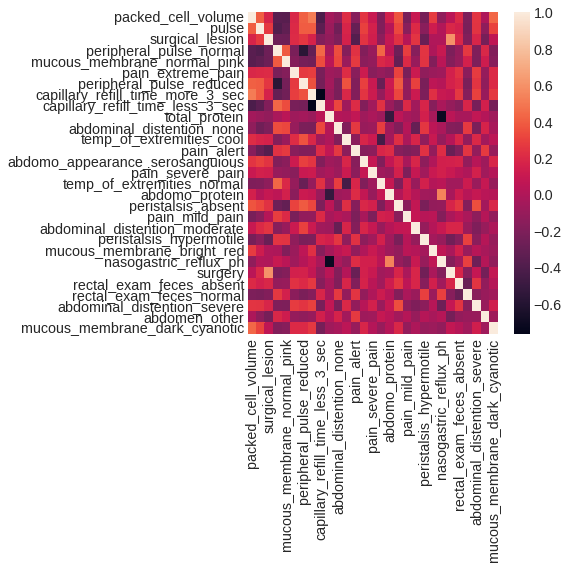

In [83]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(df[corred_cols].corr())

Trying with all columns


Mean Absolute Error: 0.38333333333333336
Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0      0.632     0.706     0.667        17
           1      0.500     0.333     0.400         9
           2      0.829     0.853     0.841        34

    accuracy                          0.733        60
   macro avg      0.653     0.631     0.636        60
weighted avg      0.723     0.733     0.725        60



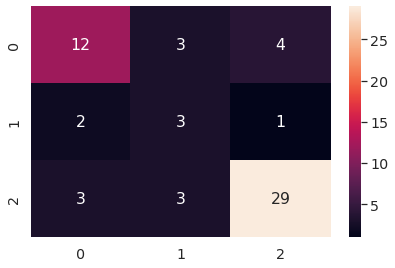

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_s = min_max_scaler.fit_transform(X_train)
X_test_s = min_max_scaler.transform(X_test)
clf = LogisticRegression(max_iter = 200)
clf.fit(X_train_s, y_train)
#
# Use the forest's predict method on the test data
y_pred = clf.predict(X_test_s)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Accuracy: %s' % metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))
cm = metrics.confusion_matrix(y_pred, y_test)
sb.set(font_scale=1.3)
sb.heatmap(cm, annot=True)
plt.show() # 0: died, 1: euthanized, 2: lived

Trying with only correlated columns

Mean Absolute Error: 0.45
Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0      0.688     0.647     0.667        17
           1      0.750     0.333     0.462         9
           2      0.725     0.853     0.784        34

    accuracy                          0.717        60
   macro avg      0.721     0.611     0.637        60
weighted avg      0.718     0.717     0.702        60



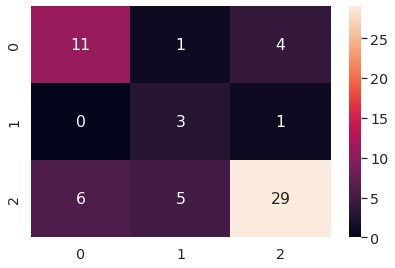

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
X_train = X_train[corred_cols]
X_test = X_test[corred_cols]
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
clf = LogisticRegression(max_iter = 200)
clf.fit(X_train, y_train)
#
# Use the forest's predict method on the test data
y_pred = clf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Accuracy: %s' % metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))
cm = metrics.confusion_matrix(y_pred, y_test)
sb.set(font_scale=1.3)
sb.heatmap(cm, annot=True)
plt.show() # 0: died, 1: euthanized, 2: lived